In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
print(dataset.DESCR)
print(dataset)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [2]:
# array→DataFrameに変換
# fetch_california_housing()は辞書型でdata(2次元配列)、target(1次元配列)、target_names(['MedHouseVal'])、
# feature_names(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'])がある
# 目的変数
df_feature = pd.DataFrame(dataset.data, columns = dataset.feature_names)
# 説明変数
df_price = pd.DataFrame(dataset.target, columns = dataset.target_names)
df_price.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


array([[<Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

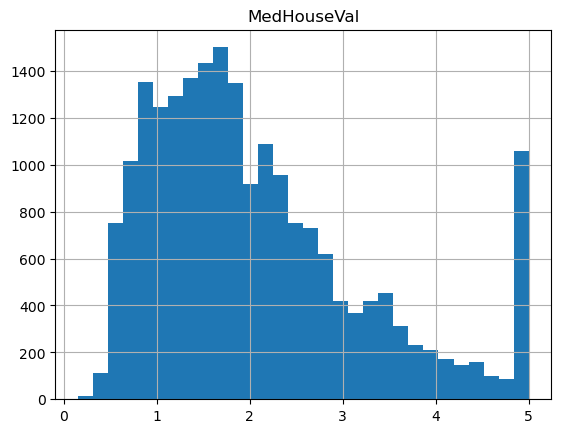

In [3]:
df_price.hist(bins=30)

In [4]:
print(df_price.mean())
print(df_price.max())
print(df_price.min())

MedHouseVal    2.068558
dtype: float64
MedHouseVal    5.00001
dtype: float64
MedHouseVal    0.14999
dtype: float64


In [5]:
# データの結合
df = pd.concat([df_feature, df_price], axis = 1)

# データの確認
print('dataframeの行数・列数の確認==>\n', df.shape)
print('indexの確認==>\n', df.index)
print('columnの確認==>\n', df.columns)
print('dataframeの各列のデータ型を確認==>\n', df.dtypes)
print('dataframeのnullの合計を列ごとに表示==>\n', df.isnull().sum())

dataframeの行数・列数の確認==>
 (20640, 9)
indexの確認==>
 RangeIndex(start=0, stop=20640, step=1)
columnの確認==>
 Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')
dataframeの各列のデータ型を確認==>
 MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object
dataframeのnullの合計を列ごとに表示==>
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [6]:
# データの確認(まとめて)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

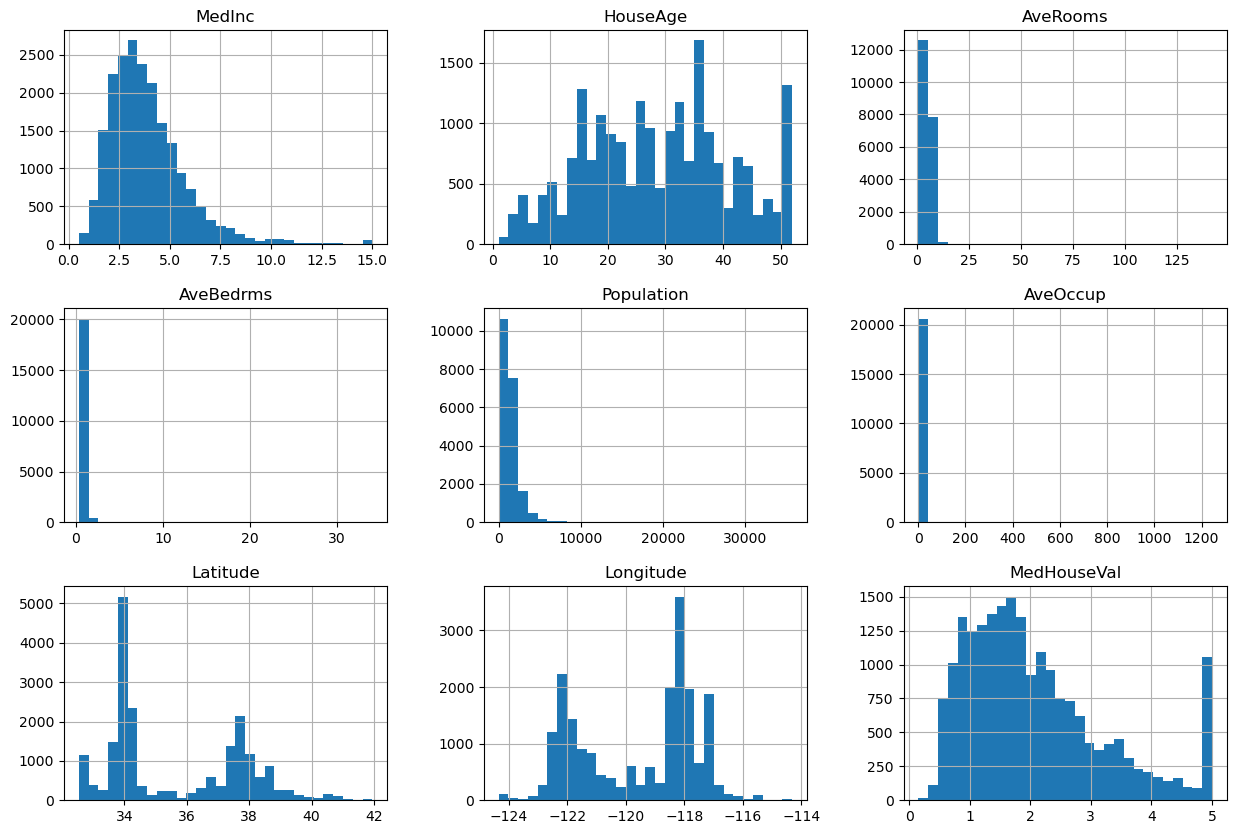

In [7]:
df.hist(bins=30, figsize=(15, 10))

In [8]:
from sklearn.model_selection import train_test_split
# 学習用モデル、テスト用モデルの作成(ランダムに分割、listで返る)
train, test = train_test_split(df, test_size=0.2)

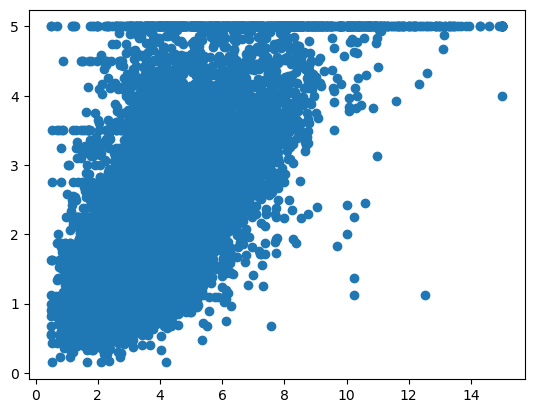

In [9]:
import matplotlib.pyplot as plt
# 説明変数　([[ ]]でDataFrame型にする)
#
x_train = train[['MedInc']]
x_test = test[['MedInc']]

# 目的変数
y_train = train[['MedHouseVal']]
y_test = test[['MedHouseVal']]

plt.scatter(x_train, y_train)
plt.show()

回帰直線の切片 0.44027390675500677
回帰係数 0.420722376244668
回帰直線 y =  0.420722376244668 x +  0.44027390675500677
決定係数 0.46976294804804275


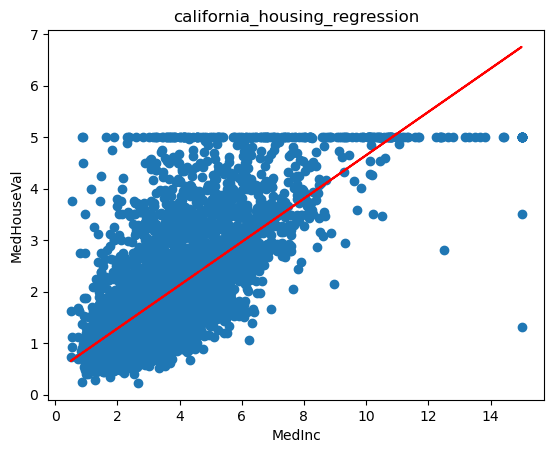

In [10]:
from sklearn.linear_model import LinearRegression as LR

model = LR()

model.fit(x_train, y_train)

# 回帰直線の切片
print('回帰直線の切片', model.intercept_[0])
# 回帰係数
print('回帰係数', model.coef_[0][0])
# 回帰直線の式
print('回帰直線', 'y = ', model.coef_[0][0], 'x + ', model.intercept_[0])

# 回帰直線と散布図を表示
plt.scatter(x_test, y_test)
plt.plot(x_test, model.predict(x_test), color='red')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('california_housing_regression')

# 決定係数を用いた評価関数(自動でy_predictsを計算してくれる)
print('決定係数', model.score(x_test, y_test))


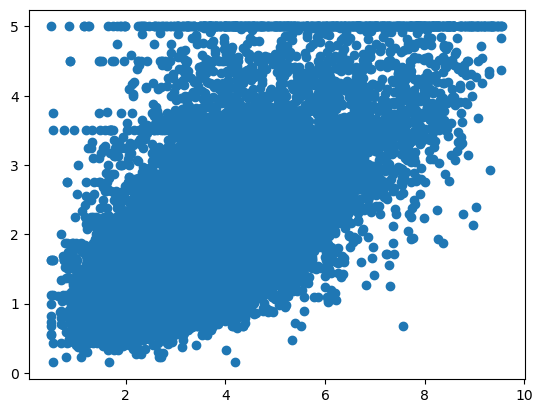

In [11]:
# 外れ値を除去(xの上位2％を除外)
# q_98 = df['MedInc'].quantile(0.98)
# # 絞り込む
# df2 = df[df['MedInc'] < q_98]

# 外れ値を除去(μ - 3σ < x < μ + 3σ)
max_value = df['MedInc'].mean() + 3 * df['MedInc'].std()
min_value = df['MedInc'].mean() - 3 * df['MedInc'].std()

df2 = df[(df['MedInc'] < max_value) & (df['MedInc'] > min_value)]

# 学習用モデル、テスト用モデルの作成
train2, test2 = train_test_split(df2, test_size=0.2)

# 説明変数
x_train2 = train2[['MedInc']]

x_test2 = test2[['MedInc']]

# 目的変数
y_train2 = train2[['MedHouseVal']]
y_test2 = test2[['MedHouseVal']]

plt.scatter(x_train2, y_train2)
plt.show()

回帰直線の切片 0.3285250266687585
回帰係数 0.4531303428644076
回帰直線 y =  0.4531303428644076 x +  0.3285250266687585
決定係数 0.4244318698926216


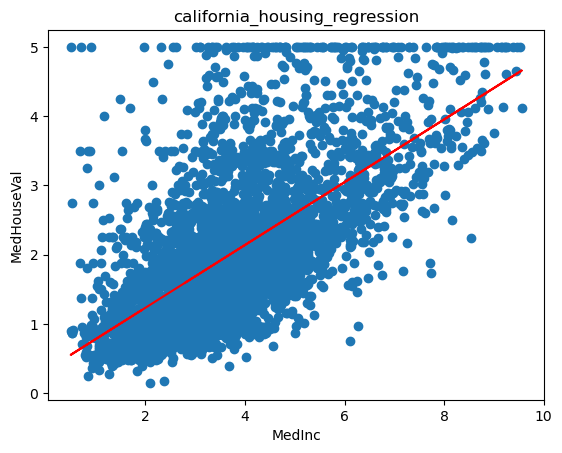

In [12]:
# モデルの設定
model = LR()
# 単回帰の実行
model.fit(x_train2, y_train2)

# 回帰直線の切片
print('回帰直線の切片', model.intercept_[0])
# 回帰係数
print('回帰係数', model.coef_[0][0])
# 回帰直線の式
print('回帰直線', 'y = ', model.coef_[0][0], 'x + ', model.intercept_[0])

# 回帰直線と散布図を表示
plt.scatter(x_test2, y_test2)
plt.plot(x_test2, model.predict(x_test2), color='red')
plt.xlabel('MedInc')
plt.ylabel('MedHouseVal')
plt.title('california_housing_regression')

# 決定係数を用いた評価関数(自動でy_predictsを計算してくれる)
print('決定係数', model.score(x_test2, y_test2))

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# パイプラインの作成(fitを実行すると、前のメソッドからfit1(学習)→transform1(推論)→fit2→ransform2...
# のように学習と推論が行われていく)
# 加えてpredictやscoreを実行すると前の学習をもとに推論のみを実行するため便利
pipeline = Pipeline([
    # xを標準化
    ('pt', StandardScaler()),
    # 単回帰処理
    ('lr', LR())
])

pipeline.fit(x_train2, y_train2)

print('決定係数', pipeline.score(x_test2, y_test2))


決定係数 0.4244318698926216


In [14]:
# 説明変数
exp_vars = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
x_train3 = train[exp_vars]
x_test3 = test[exp_vars]

# 目的変数
tar_var = ['MedHouseVal']
y_train3 = train[tar_var]
y_test3 = test[tar_var]

# パイプラインを用いたモデルの学習
pipeline.fit(x_train3, y_train3)

# 決定係数を用いた評価関数
print('決定係数', pipeline.score(x_test3, y_test3))


# 平均二乗誤差を用いた評価関数
from sklearn.metrics import mean_squared_error
print('平均二乗誤差',mean_squared_error(y_test3, pipeline.predict(x_test3)))

決定係数 0.607271510943191
平均二乗誤差 0.5292019036489611


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>],
       [<Axes: title={'center': '3'}>, <Axes: title={'center': '4'}>,
        <Axes: title={'center': '5'}>],
       [<Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>,
        <Axes: >]], dtype=object)

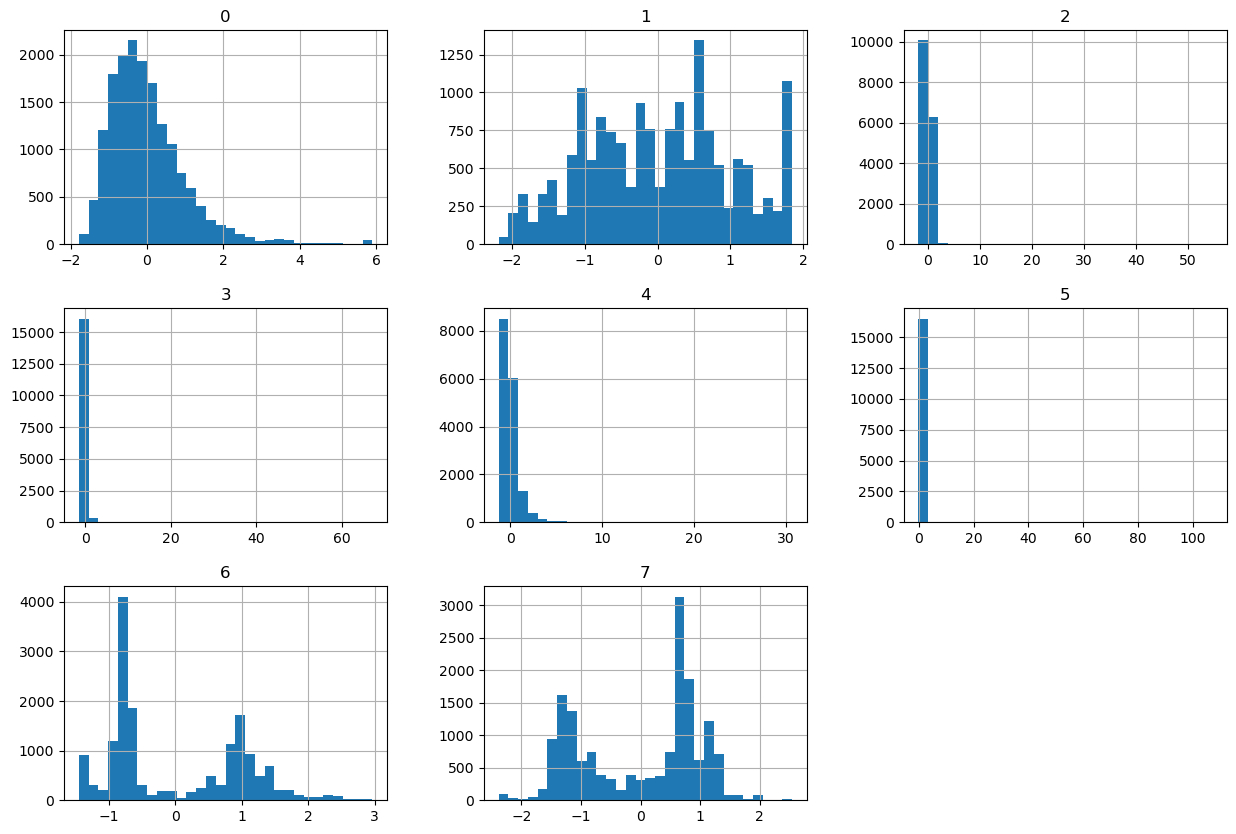

In [15]:
# 標準化処理の確認
scaler = StandardScaler()
scaler.fit(x_train3)
x_scaler = scaler.transform(x_train3)
x_df = pd.DataFrame(x_scaler)
x_df.hist(bins=30, figsize=(15, 10))